<a href="https://colab.research.google.com/github/mondragonda/notebooks/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib pip install scipy pip install sklearn


result scipy: [[0.26238691 0.51474923]
 [0.81212927 0.79921946]] 



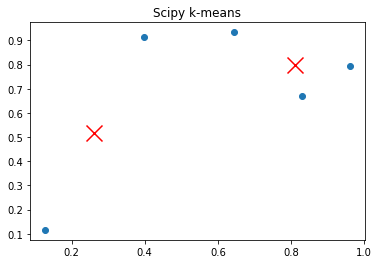


result sklearn: 
 [[0.52045194 0.92355992]
 [0.12795755 0.11583223]
 [0.8961501  0.73210239]] 



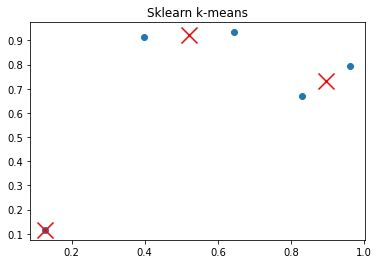


result scratch: 
 [[0.38962048 0.65431736]
 [0.64408761 0.93345361]
 [0.8961501  0.73210239]] 



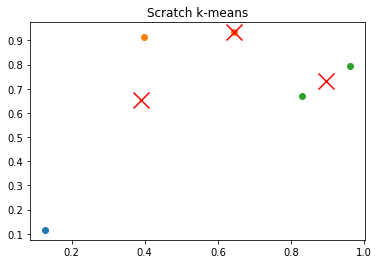

In [165]:
import numpy as np
import matplotlib.pyplot as pyplot
from math import sqrt

data_points = np.random.random_sample((5, 2))
initial_centroids = data_points.take(np.random.randint(0, data_points.shape[0], 3), 0)

def plot_centroids(title, centroids):
  pyplot.scatter(data_points[:, 0], data_points[:, 1])
  pyplot.scatter(centroids[:,0], centroids[:,1], marker='x', s=256, c="red")
  pyplot.title(title)
  pyplot.show()

def k_means():
  colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
  centroids = initial_centroids.copy()
  clusters = [[] for centroid in initial_centroids]
  last_centroids = None
  while True:
    for data_point in data_points:
      distances = []
      for centroid in centroids:
        centroid_point_distance = sqrt((data_point[0] - centroid[0])**2 + (data_point[1] - centroid[1])**2)
        distances.append(centroid_point_distance)
      nearest_centroid_index = np.argmin(np.array(distances))
      clusters[nearest_centroid_index].append(data_point)
    if np.array_equal(last_centroids, centroids):
      print('\nresult scratch: \n',centroids, '\n')
      for cluster in range(len(clusters)):
        cluster_np = np.array(clusters[cluster])
        if cluster_np.size > 0:
          pyplot.scatter(cluster_np[:,0], cluster_np[:,1], c=colors[cluster])
      pyplot.scatter(centroids[:,0], centroids[:,1], marker='x', s=256, c="red")
      pyplot.title('Scratch k-means')
      pyplot.show()
      break
    last_centroids = centroids  
    for centroid in range(centroids.shape[0]):
      if len(clusters[centroid]) > 0:
        centroid_mean = np.array(clusters[centroid]).mean(axis=0)
        if not np.array_equal(centroid_mean, centroids[centroid]):
          centroids[centroid] = centroid_mean
          clusters[centroid] = []

from scipy.cluster.vq import vq, kmeans, whiten

def k_means_scipy():
  centroids = initial_centroids.copy()
  codebook = kmeans(data_points, centroids)
  print('\nresult scipy:', codebook[0], '\n')
  plot_centroids('Scipy k-means', codebook[0])

from sklearn.cluster import KMeans

def k_means_scikit_learn():
  centroids = initial_centroids.copy()
  kmeans = KMeans(3, init=centroids, n_init=1).fit(data_points)
  print('\nresult sklearn: \n', kmeans.cluster_centers_, '\n')
  plot_centroids('Sklearn k-means', kmeans.cluster_centers_)

k_means_scipy()
k_means_scikit_learn()
k_means()






